<a href="https://colab.research.google.com/github/gayatribandaru/Apache-Beam-data-engineering-assignment/blob/main/Datamining_Question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

# Load the dataset
file_path = '/content/train_and_test2.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [7]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 44.5 MB/s eta 0:00:00


In [8]:
import sweetviz as sv

# Generating the Sweetviz report
report = sv.analyze(data)

# Saving the report to a file
report_path = '/content/train_and_test2.csv'
report.show_html(report_path)

report_path


                                             |          | [  0%]   00:00 -> (? left)

Report /content/train_and_test2.csv was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


'/content/train_and_test2.csv'

In [11]:
# Displaying summary statistics of the numerical columns
summary_statistics = data.describe()

# Checking for missing values
missing_values = data.isnull().sum()

summary_statistics, missing_values[missing_values > 0]


(       Passengerid          Age         Fare          Sex        sibsp  \
 count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000   
 mean    655.000000    29.503186    33.281086     0.355997     0.498854   
 std     378.020061    12.905241    51.741500     0.478997     1.041658   
 min       1.000000     0.170000     0.000000     0.000000     0.000000   
 25%     328.000000    22.000000     7.895800     0.000000     0.000000   
 50%     655.000000    28.000000    14.454200     0.000000     0.000000   
 75%     982.000000    35.000000    31.275000     1.000000     1.000000   
 max    1309.000000    80.000000   512.329200     1.000000     8.000000   
 
          zero  zero.1  zero.2  zero.3  zero.4  ...  zero.12  zero.13  zero.14  \
 count  1309.0  1309.0  1309.0  1309.0  1309.0  ...   1309.0   1309.0   1309.0   
 mean      0.0     0.0     0.0     0.0     0.0  ...      0.0      0.0      0.0   
 std       0.0     0.0     0.0     0.0     0.0  ...      0.0      0.0      0.

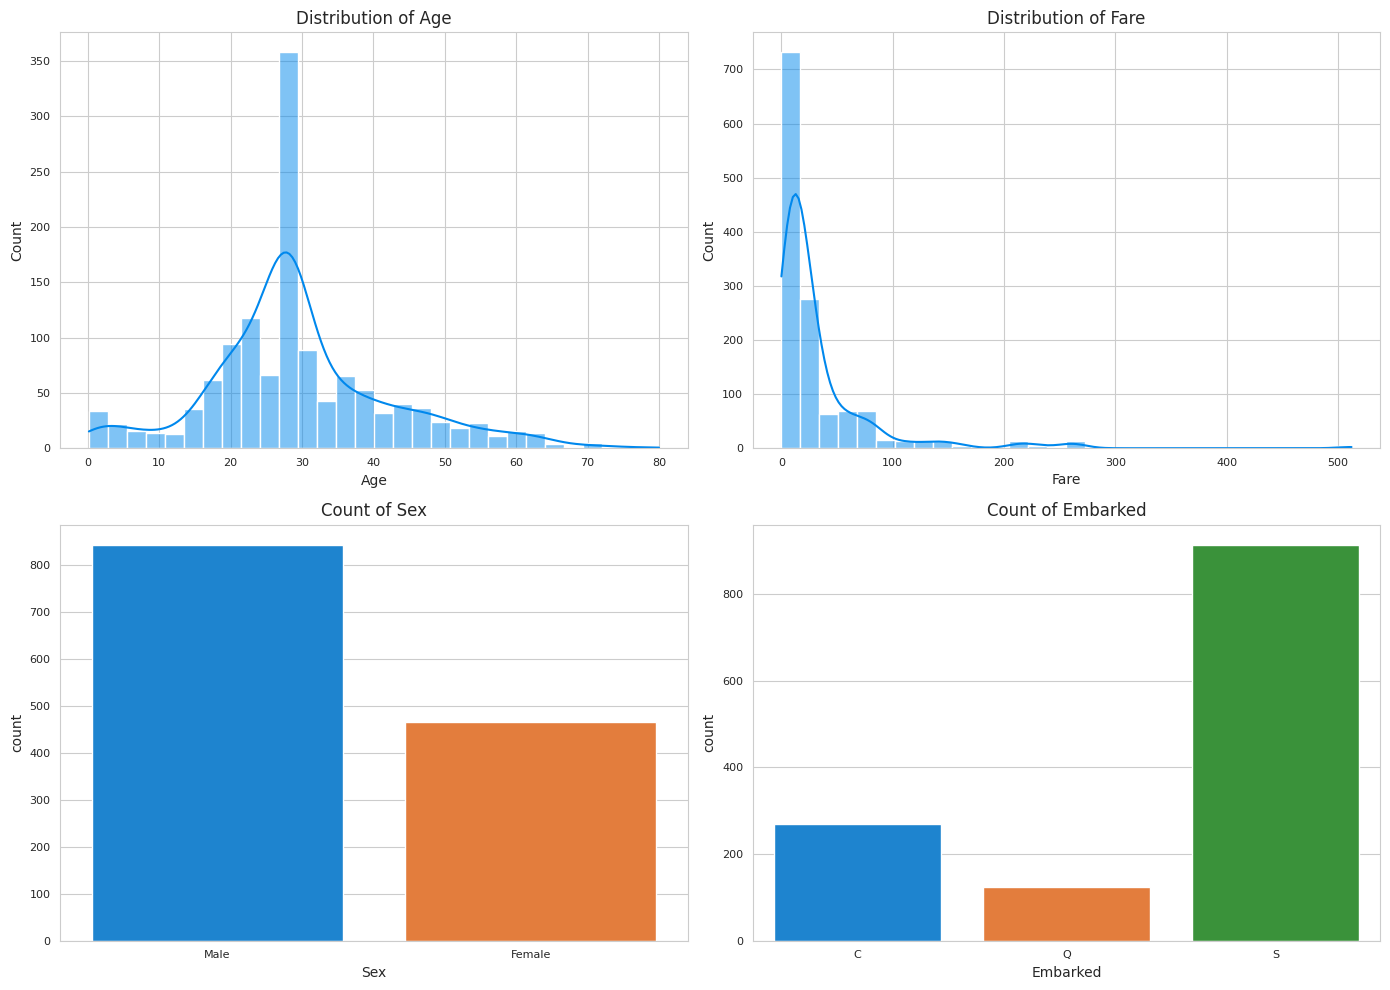

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plotting the distribution of the Age column
sns.histplot(data['Age'], bins=30, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Age')

# Plotting the distribution of the Fare column
sns.histplot(data['Fare'], bins=30, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Fare')

# Count plot for the Sex column
sns.countplot(x='Sex', data=data, ax=axs[1, 0])
axs[1, 0].set_title('Count of Sex')
axs[1, 0].set_xticklabels(['Male', 'Female'])

# Count plot for the Embarked column
sns.countplot(x='Embarked', data=data, ax=axs[1, 1])
axs[1, 1].set_title('Count of Embarked')
axs[1, 1].set_xticklabels(['C', 'Q', 'S'])

plt.tight_layout()
plt.show()


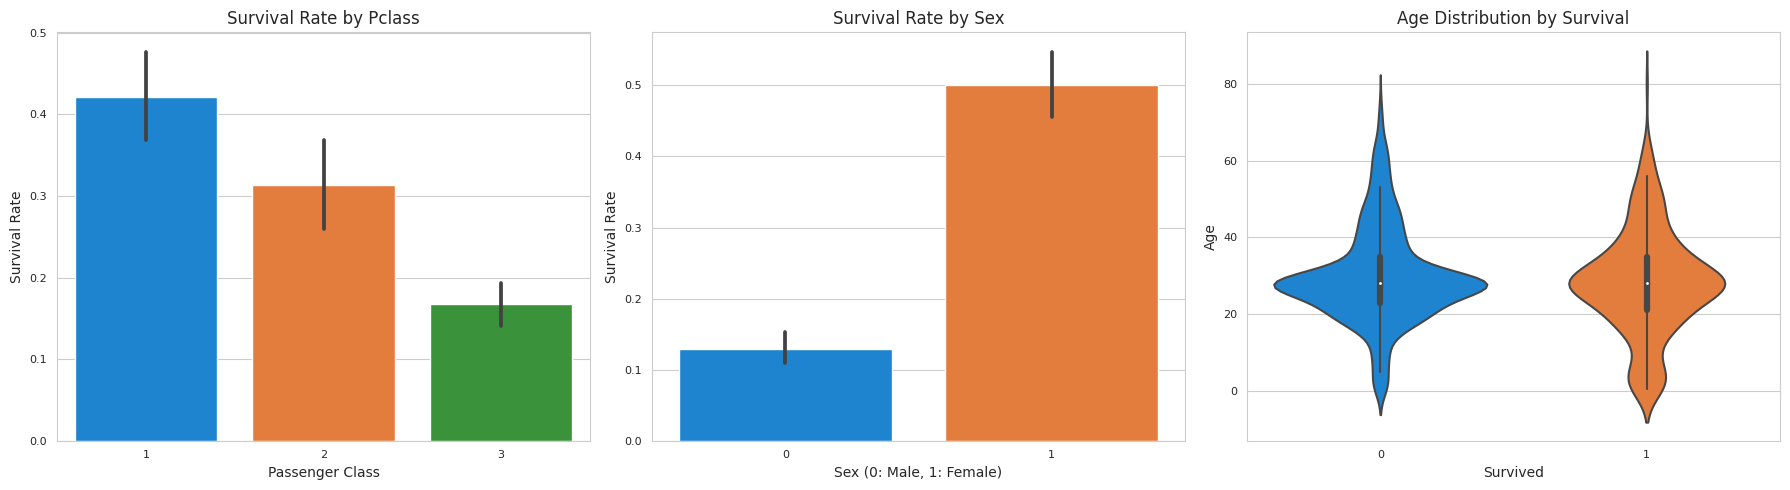

In [13]:
# Renaming the '2urvived' column to 'Survived' for better understanding
data.rename(columns={'2urvived': 'Survived'}, inplace=True)

# Creating subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Bar plot to visualize survival rates based on Pclass
sns.barplot(x='Pclass', y='Survived', data=data, ax=axs[0])
axs[0].set_title('Survival Rate by Pclass')
axs[0].set_xlabel('Passenger Class')
axs[0].set_ylabel('Survival Rate')

# Bar plot to visualize survival rates based on Sex
sns.barplot(x='Sex', y='Survived', data=data, ax=axs[1])
axs[1].set_title('Survival Rate by Sex')
axs[1].set_xlabel('Sex (0: Male, 1: Female)')
axs[1].set_ylabel('Survival Rate')

# Violin plot to visualize the distribution of Age of survived and not survived passengers
sns.violinplot(x='Survived', y='Age', data=data, ax=axs[2])
axs[2].set_title('Age Distribution by Survival')
axs[2].set_xlabel('Survived')
axs[2].set_ylabel('Age')

plt.tight_layout()
plt.show()


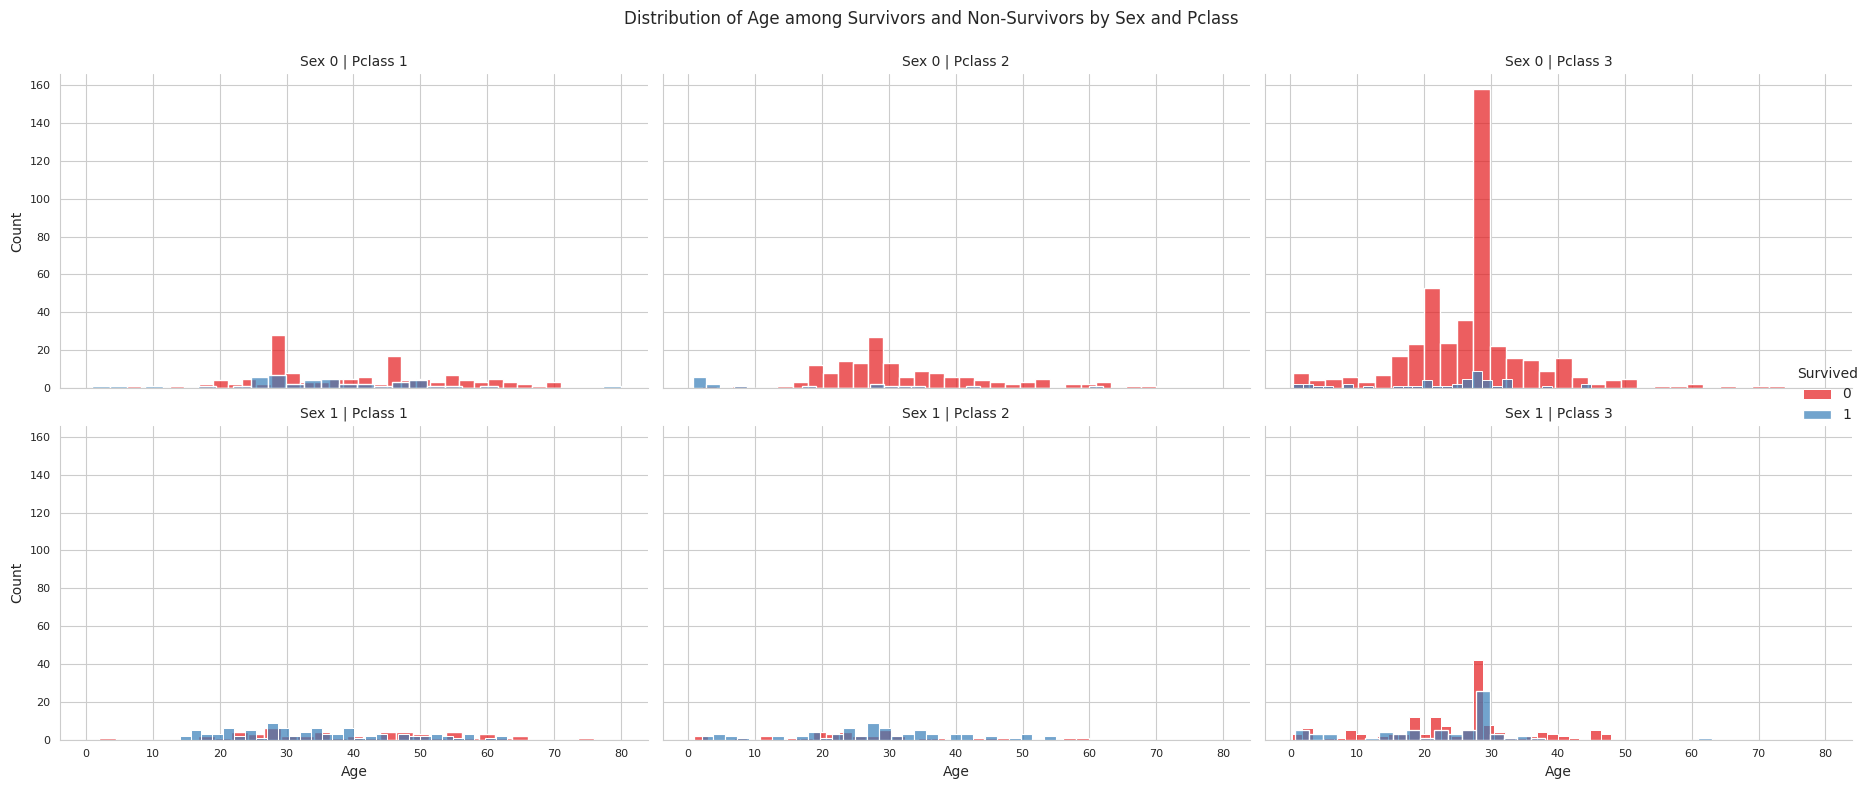

In [14]:
# Creating a FacetGrid to visualize the interaction between Age, Sex, Pclass, and Survival
g = sns.FacetGrid(data, row='Sex', col='Pclass', hue='Survived', height=4, aspect=1.5, palette='Set1')
g.map_dataframe(sns.histplot, x='Age', bins=30, alpha=0.7)
g.set_axis_labels('Age', 'Count')
g.set_titles(col_template='Pclass {col_name}', row_template='Sex {row_name}')
g.add_legend(title='Survived')

# Adjusting the layout for better appearance
g.fig.tight_layout()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Age among Survivors and Non-Survivors by Sex and Pclass')

plt.show()


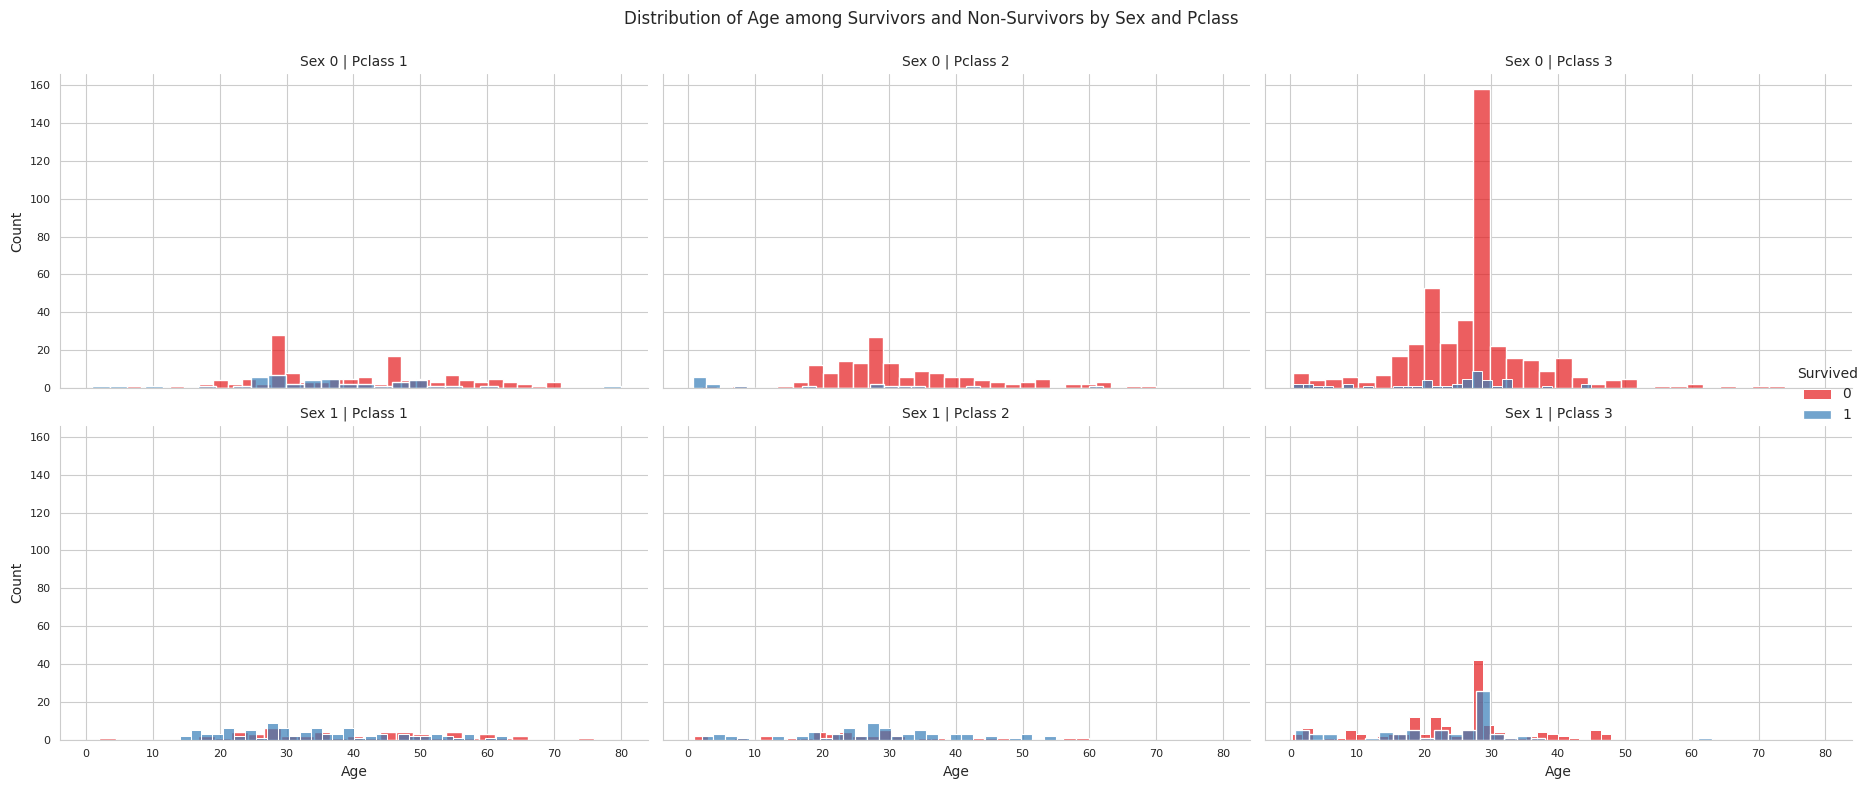

In [15]:
# Trying to create the FacetGrid visualization again
g = sns.FacetGrid(data, row='Sex', col='Pclass', hue='Survived', height=4, aspect=1.5, palette='Set1')
g.map_dataframe(sns.histplot, x='Age', bins=30, alpha=0.7)
g.set_axis_labels('Age', 'Count')
g.set_titles(col_template='Pclass {col_name}', row_template='Sex {row_name}')
g.add_legend(title='Survived')

# Adjusting the layout for better appearance
g.fig.tight_layout()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Age among Survivors and Non-Survivors by Sex and Pclass')

plt.show()


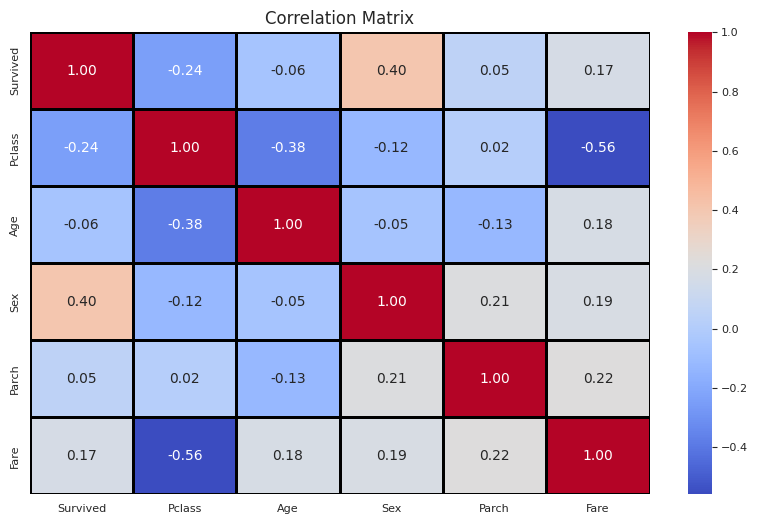

In [17]:
# Calculating the correlation matrix
correlation_matrix = data[['Survived', 'Pclass', 'Age', 'Sex', 'Parch', 'Fare']].corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=2, linecolor='black')
plt.title('Correlation Matrix')
plt.show()